# Simple Linear Regression - Salary Data #
Use the dataset ***SLR_Data.csv*** for this exercise.


## Import relevant packages and read the data ##

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("../datasets/SLR_salary.csv")

## Explore the data ##


In [129]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


The data has two variables, years of experiance and salary. I assume that each row is a different employee. 

In [130]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


There are 30 rows of data (employees) with reasonable looking descriptive statistics. Nothing jumps out as being a problem from this data.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


There are no null values so there aren't issues with missing data that need to be considered.

In [132]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


There is a very high positive correlation coefficient between years of experiance and salary.

## Plot a Scatter graph ##

Text(0, 0.5, 'Salary')

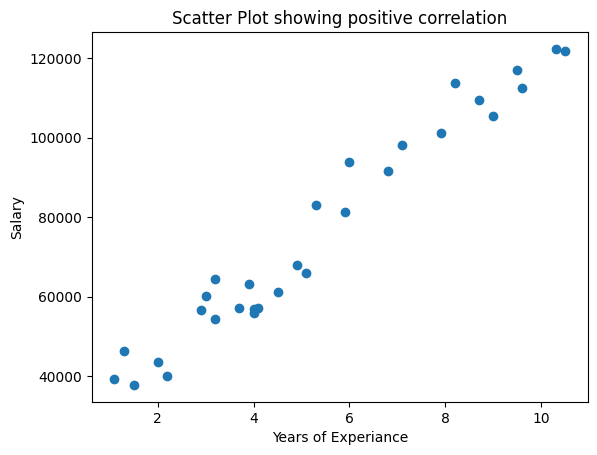

In [133]:
years_experience = df["YearsExperience"]
salary = df["Salary"]

# Create a scatter plot of the data points
plt.scatter(years_experience, salary)
plt.title('Scatter Plot showing positive correlation')
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')

The scatter graph looks like positive linear correlation with no outliers, all points are close to the trend. There looks like there could possibly be some clustering of newer employees with lower salaries but I do not think this data is sufficient to support that.  

## Split the DataFrame into train and test data ##

In [134]:
train, test = train_test_split(
    df,
    random_state = 13 # this ensures that we get the same answer each time
)

print("The training data is:\n",train)
print("The test data is:\n",test)

The training data is:
     YearsExperience  Salary
17              5.3   83088
21              7.1   98273
0               1.1   39343
19              6.0   93940
4               2.2   39891
11              4.0   55794
9               3.7   57189
27              9.6  112635
13              4.1   57081
5               2.9   56642
14              4.5   61111
24              8.7  109431
23              8.2  113812
3               2.0   43525
12              4.0   56957
20              6.8   91738
2               1.5   37731
6               3.0   60150
28             10.3  122391
10              3.9   63218
16              5.1   66029
18              5.9   81363
The test data is:
     YearsExperience  Salary
22              7.9  101302
15              4.9   67938
26              9.5  116969
1               1.3   46205
25              9.0  105582
8               3.2   64445
7               3.2   54445
29             10.5  121872


Of the 30 datapoints, 22 are part of the training data and 8 are part of the test data. The default test proportion of data, as used here, is 25% of data (or as close as it can be to 25%).


 ## Train the model



I am using the years of experiance as the independent variable and the salary and the dependent variable.

No context for this data is given but I will assume that years of experiance is independent of salary. The experiance is years of employement or similar. 

I would  argue that this could not be wholly accurate depending on the details of what this data represents. If years of experiance is the years spent at a particular company then the variables are likely not independent. Salary might rise with experiance at a job but an employee may choose how long to stay at a company based on how good the pay is, low pay could lead an employee to leave after a short period of time. 

In [135]:
dependent_var = train['Salary']
independent_var = train['YearsExperience']
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

## Interpret the model results


In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     398.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.13e-14
Time:                        15:08:14   Log-Likelihood:                -221.31
No. Observations:                  22   AIC:                             446.6
Df Residuals:                      20   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.306e+04   2795.184      8.249      0.000    1.72e+04    2.89e+04
YearsExperience  9955.3660    498.963     19.952      0.000    8914.548     1.1e+04
==============================================================================
Omnibus:                        2.515   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.394
Skew:                           0.303   Prob(JB):                        0.498
Kurtosis:                       1.926   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Line of Best Fit (LBF) determined by the model is:

y = 9955.3660 x + 23060

where y is Salary
      x is Years of Experiance

This means the predicted started Salary is 23060 (units unknown) with an increase of 9955 for each year of experiance.

**p-value**

The p-value is zero to the accuracy of the summary so there is extremely high statistical significance to the finding that the variables are corralated. The chance of this data occuring by coincidence is very low. 

**R-squared**

There is an incredibly high R-squared value of 0.952 so the data very closely fits the model. The adjusted R-squared value os also very high. 

**F-Statistic**

The F-statistic is high (398.1) which indicates this regression model is much better fit to the data than the base  model (taking the mean).

**Prob F-Statistic**

This is very low (1.13e-14) meaning the regression model is better than the base model with statistical significance. 

## Predict data in the test set ##



In [137]:
# Predict the model results on the test data

predicted = model.predict(
    sm.add_constant(test['YearsExperience'])
)

## Is the model also 'a good fit' for our test data? ##


In [138]:
metrics.r2_score(test['Salary'],predicted)

0.952797021479343

This step tests the model developed on the training data on a different set of data, the test data. The R-squared value is still incredibly high indicating this test data very closely fits the model. 

The test data value above is actually very slightly greater than the training data value of 0.952, showing the test data is very slightly more closely fitted to the data. This doesn't seem strange given the small number of points in the test data (8) so there is a chance the test data is closer to the LBF. 

I ran this code with a few different random_state values to give different datapoints in the training and test dataframes and found this number flunctuates (as does the model) as expected. 

## Rebuild the model for the whole data set ##

In [139]:
dependent_var = df['Salary']
independent_var = df['YearsExperience']
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        15:08:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note: 
- LBF equation: y = 9449.9623 * x + 25790 previously y = 9955.3660 x + 23060
- R-squared value and F-Statistic have increased compared to model based on training data. 

## Make a prediction ##

In [140]:
test_experiances = [2.3, 7.0, 40.0]
predicted_salaries = []

for test_experiance in test_experiances:
    salary_pred_model = model.predict([1, test_experiance])
    salary_pred_lbf = 9449.9623*test_experiance + 25790
    print(f'The model predicted salary for an employee with {test_experiance} years experiance is: ',round(salary_pred_model[0]))
    print(f'The LBF predicted salary for an employee with {test_experiance} years experiance is: {round(salary_pred_lbf)}')
    print('The difference is: ', salary_pred_model - salary_pred_lbf, '\n')
    predicted_salaries.append(salary_pred_model)

The model predicted salary for an employee with 2.3 years experiance is:  47527
The LBF predicted salary for an employee with 2.3 years experiance is: 47525
The difference is:  [2.20024802] 

The model predicted salary for an employee with 7.0 years experiance is:  91942
The LBF predicted salary for an employee with 7.0 years experiance is: 91940
The difference is:  [2.20034885] 

The model predicted salary for an employee with 40.0 years experiance is:  403791
The LBF predicted salary for an employee with 40.0 years experiance is: 403788
The difference is:  [2.20105687] 



I note a small discrepency between the values above and those I calculated using the LBF equation. In each case the model predicted salary is 2 more than found using the LBF. This discrepency is almost equal in each case so I expect this is due to rounding of the const value in the model summary that I used in my LBF. 

Text(0, 0.5, 'Salary')

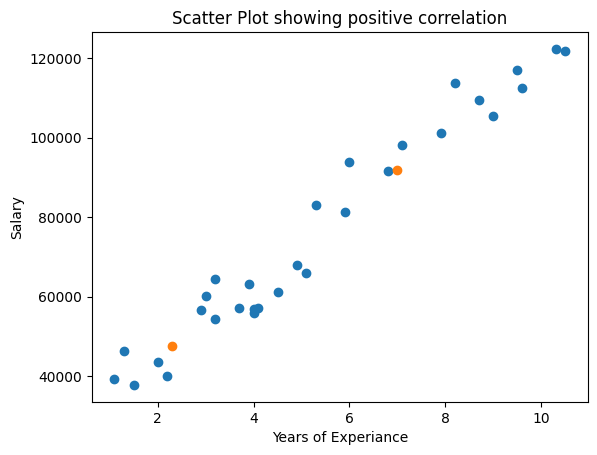

In [141]:
plt.scatter(years_experience, salary)
plt.scatter(test_experiances[:2], predicted_salaries[:2])
plt.title('Scatter Plot showing positive correlation')
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')

I plotted the model predicted points for the first two values of years of experiance on the original data and they do indeed match well. The two input values were within the range of the original data. 

Text(0, 0.5, 'Salary')

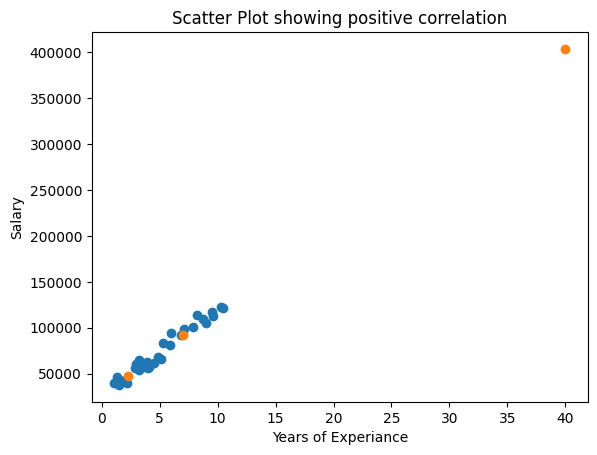

In [142]:
plt.scatter(years_experience, salary)
plt.scatter(test_experiances, predicted_salaries)
plt.title('Scatter Plot showing positive correlation')
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')

The third test datapoint was far outside of the range of the original data, at the uppermost end of a reasonable value, which was an employee with 40 years of experiance. This model would predict such an employee would earn 3 times as much as any other employee. I would not consider this a fair extrapolation from the analysis conducted. I think the range in which the model is valid would be for the range of the original data, maybe extended slightly on either end. Not these values far outside the values of the original data. 